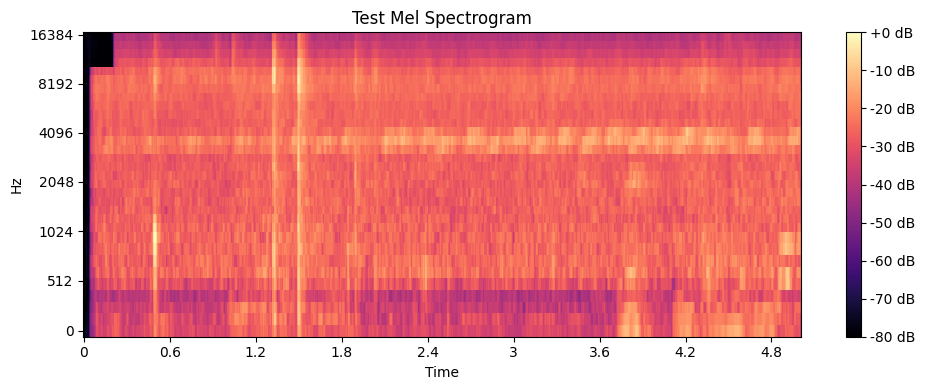

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# Load your audio file
AUDIO_PATH = "data/train_raw5/21038/iNat65519.ogg"
y, sr = librosa.load(AUDIO_PATH, sr=None)

# Function to generate and display a mel spectrogram
def show_mel_spectrogram(
    y,
    sr,
    n_fft=2048,
    hop_length=512,
    n_mels=128,
    fmin=0,
    fmax=None,
    win_length=None,
    window="hann",
    power=2.0,
    title=None
):
    S = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_fft=n_fft,
        hop_length=hop_length,
        n_mels=n_mels,
        fmin=fmin,
        fmax=fmax,
        win_length=win_length,
        window=window,
        power=power
    )
    S_dB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_dB, sr=sr, hop_length=hop_length,
                             x_axis='time', y_axis='mel', fmax=fmax)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title or f"Mel Spectrogram (n_mels={n_mels}, n_fft={n_fft})")
    plt.tight_layout()
    plt.show()

n_mels = [16, 32, 64, 128]

for mels in n_mels:
    # Example usage: modify parameters here
    show_mel_spectrogram(
        y,
        sr,
        n_fft=1024,
        hop_length=256,
        n_mels=mels,
        fmin=20,
        fmax=sr // 2,
        title="Test Mel Spectrogram"
    )
